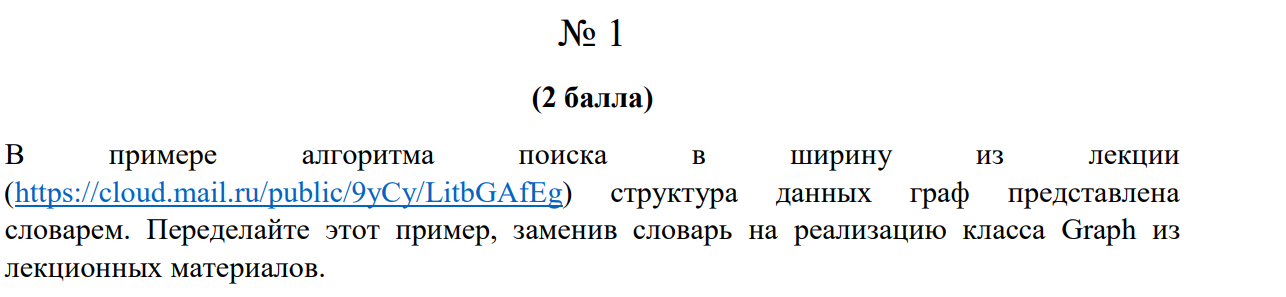

In [5]:
from collections import deque;

class Vertex:
    def __init__(self, key):
        self.id = key
        self.neighbors = {}
        
    def add_neighbor(self, neighbor, weight = 0):
        self.neighbors[neighbor] = weight
        
    def get_neighbors(self):
        return self.neighbors.keys()
    
    
class Graph:
    def __init__(self):
        self.vert_dict = {}
        self.num_vertices = 0
    
    def addVertex(self, key):
        self.num_vertices += 1
        new_vertex = Vertex(key)
        self.vert_dict[key] = new_vertex
        return new_vertex
    
    def getVertex(self,key):
        return self.vert_dict.get(key)
    
    def addEdge(self, from_key, to_key, weight = 0):
        if from_key not in self.vert_dict:
            self.addVertex(from_key)
        
        if to_key not in self.vert_dict:
            self.addVertex(to_key)
        
        self.vert_dict[from_key].add_neighbor(self.vert_dict[to_key],weight)
        
    def getVertices(self):
        return list(self.vert_dict.keys())
    
    def __contains__(self, key):
        return key in self.vert_dict
    

def person_is_seller(name):
    return name[0] == 'a'

g = Graph()
g.addVertex("you")
g.addVertex("alice")
g.addVertex("bob")
g.addVertex("claire")
g.addVertex("anuj")
g.addVertex("peggy")
g.addVertex("thom")
g.addVertex("jonny")

g.addEdge("you", "alice")
g.addEdge("you", "bob")
g.addEdge("you", "claire")
g.addEdge("bob", "anuj")
g.addEdge("bob", "peggy")
g.addEdge("alice", "peggy")
g.addEdge("claire", "thom")
g.addEdge("claire", "jonny")

def search(name):
    search_queue = deque()
    start_vertex = g.getVertex(name)
    searched = set()
    
    for neighbor in start_vertex.get_neighbors():
        search_queue.append(neighbor)
        
    while search_queue:
        person_vertex = search_queue.popleft()
        person = person_vertex.id
        if person not in searched:
            if person_is_seller(person):
                print(f"{person} is a mango seller!")
                return True
            else:
                for neighbor in person_vertex.get_neighbor():
                    search_queue.append(neighbor)
                searched.add(person)
    return False

search("you")

alice is a mango seller!


True